# Вайтехович Игорь

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from prophet import Prophet
from matplotlib import pyplot as plt

<span style='color:rgb(0,12,102)'><b>Загрузим данные</b></span>

In [2]:
df_monthly = pd.read_csv("salesmonthly.csv")
df_monthly = df_monthly.rename(columns=lambda c: c.lower().replace('-', '_').replace('/', '_').replace(' ', '_'))

In [3]:
df_monthly

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [4]:
df_monthly.dtypes

datum     object
m01ab    float64
m01ae    float64
n02ba    float64
n02be    float64
n05b     float64
n05c     float64
r03      float64
r06      float64
dtype: object

In [5]:
df_monthly['datum'] = pd.to_datetime(df_monthly['datum'], format= '%Y-%m-%d')
df_monthly

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70
...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10


In [6]:
df_monthly.isna().sum()

datum    0
m01ab    0
m01ae    0
n02ba    0
n02be    0
n05b     0
n05c     0
r03      0
r06      0
dtype: int64

In [7]:
df_monthly.isnull().sum()

datum    0
m01ab    0
m01ae    0
n02ba    0
n02be    0
n05b     0
n05c     0
r03      0
r06      0
dtype: int64

<span style='color:rgb(0,12,102)'><b>Изучим датасет</b></span>

In [8]:
df_monthly.describe()

,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [9]:
df_monthly['year'] = df_monthly['datum'].dt.year
df_monthly['month'] = df_monthly['datum'].dt.month
df_monthly['day'] = df_monthly['datum'].dt.day
df_monthly

,datum,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06,year,month,day
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.20,2014,1,31
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.20,2014,2,28
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.40,2014,3,31
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.70,2014,4,30
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.70,2014,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2019-06-30,151.54,101.627,103.200,610.000,193.0,25.0,142.0,156.04,2019,6,30
66,2019-07-31,181.00,103.541,92.800,649.800,250.6,20.0,115.0,105.20,2019,7,31
67,2019-08-31,181.91,88.269,84.200,518.100,237.0,26.0,145.0,97.30,2019,8,31
68,2019-09-30,161.07,111.437,93.500,984.480,227.8,16.0,161.0,109.10,2019,9,30


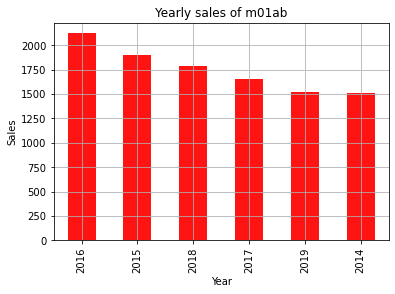

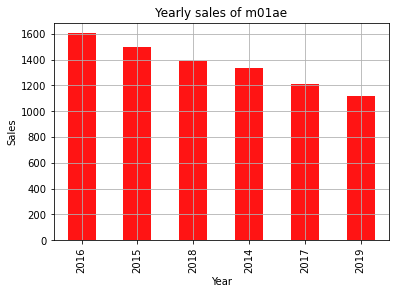

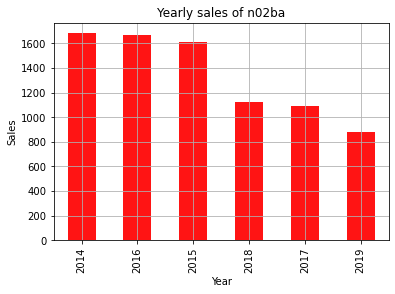

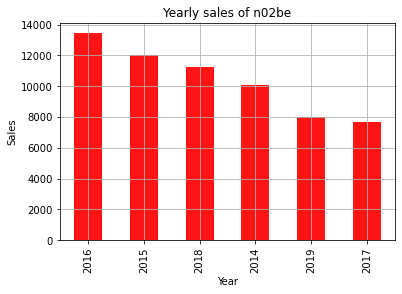

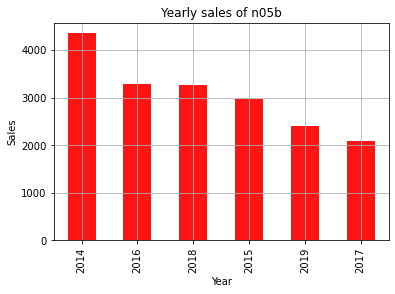

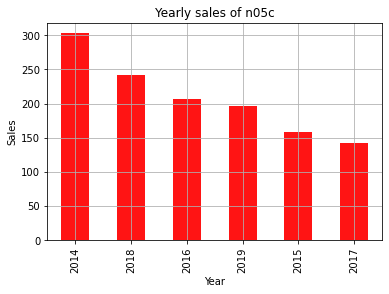

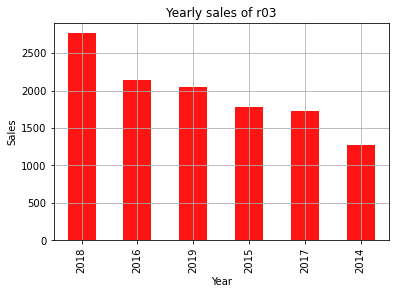

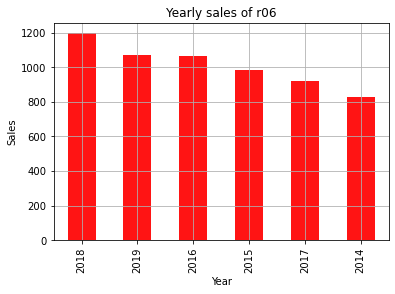

In [10]:
def plot_yearly_sales(column):
    df_monthly.groupby('year')[column].sum().sort_values(ascending = False).plot.bar(color = (255/255,20/255,20/255))
    plt.title(f'Yearly sales of {column}')
    plt.xlabel('Year')
    plt.ylabel('Sales')
    plt.grid()
    plt.show()

for i in df_monthly.columns[1:9]:
    plot_yearly_sales(i)

<span style='color:rgb(0,255,0)'><b>Из этих графиков можно определить, в каком году каждого типа препаратов было продано больше/меньше всего.</b></span>

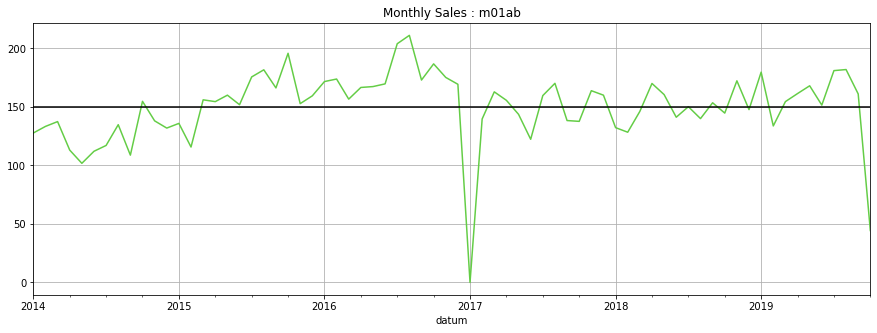

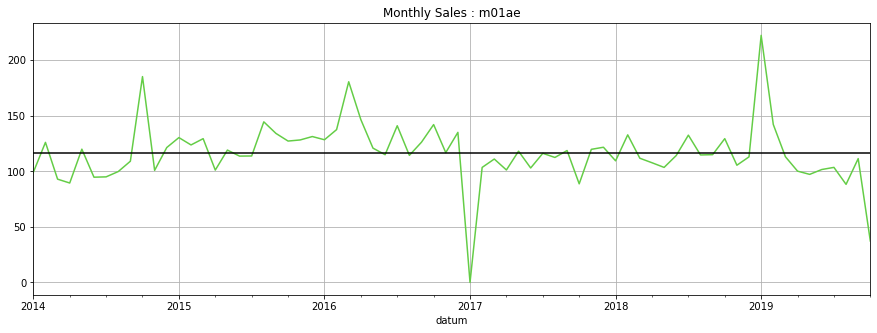

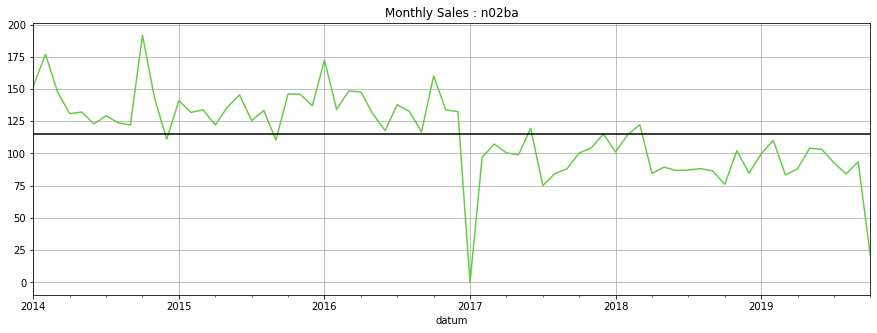

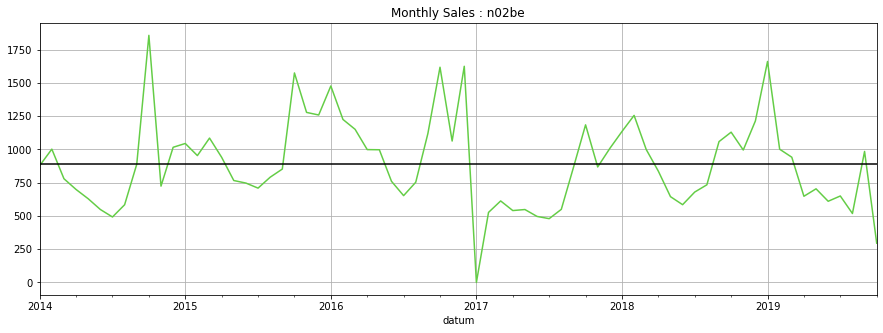

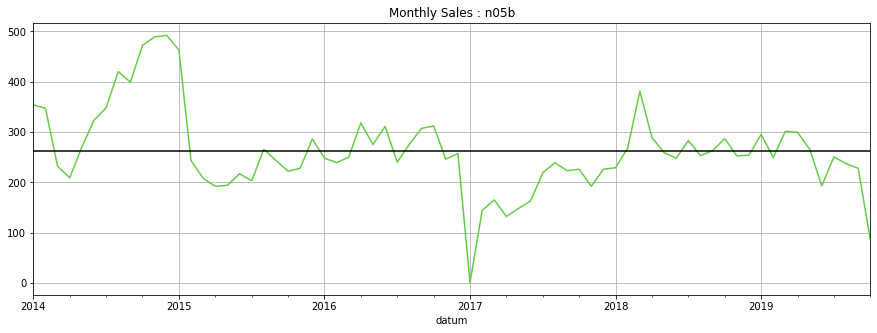

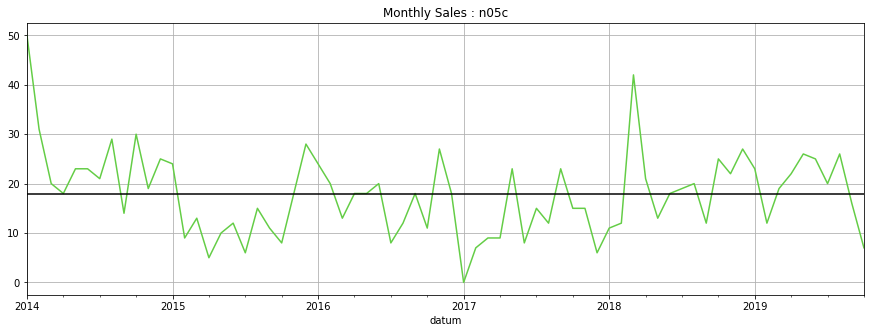

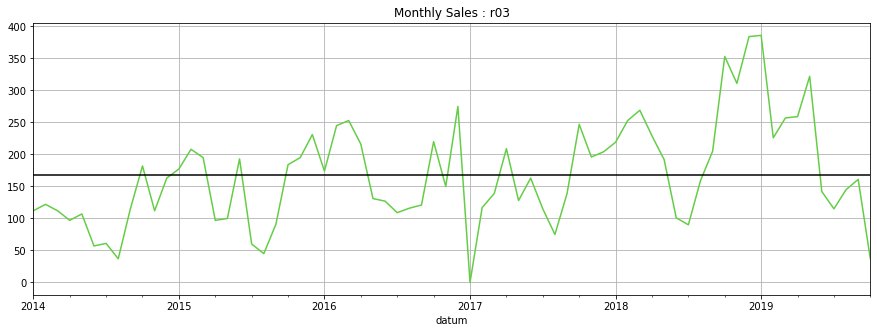

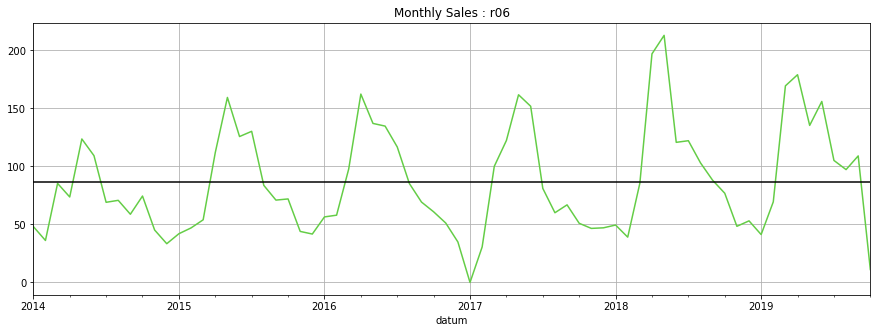

In [11]:
df_monthly.set_index(df_monthly['datum'], inplace= True)
def plot_line_curve(series):
    plt.figure(figsize= (15,5))
    series.plot(kind= 'line',color = (100/255,205/255,70/255))
    plt.title(f'Monthly Sales : {col}')
    plt.axhline (y=np.nanmean (series),color = 'black')
    plt.grid()
    plt.show()
for col in df_monthly.columns[1:9]:
    plot_line_curve(df_monthly[col])

<span style='color:rgb(0,12,102)'><b>Изучим связь между данными</b></span>

In [12]:
sales = df_monthly.drop(columns = ['datum','year','month','day'])
corr = sales.corr()
corr.style.background_gradient(cmap='RdYlGn')

,m01ab,m01ae,n02ba,n02be,n05b,n05c,r03,r06
m01ab,1.000000,0.597433,0.414754,0.421258,0.191444,0.079730,0.314224,0.307634
m01ae,0.597433,1.000000,0.557838,0.700727,0.398711,0.162850,0.444481,0.028693
n02ba,0.414754,0.557838,1.000000,0.546049,0.492957,0.273581,0.044137,-0.033713
n02be,0.421258,0.700727,0.546049,1.000000,0.374160,0.211104,0.605476,-0.287455
n05b,0.191444,0.398711,0.492957,0.374160,1.000000,0.580570,0.125204,-0.056787
n05c,0.079730,0.162850,0.273581,0.211104,0.580570,1.000000,0.218196,-0.014792
r03,0.314224,0.444481,0.044137,0.605476,0.125204,0.218196,1.000000,0.000135
r06,0.307634,0.028693,-0.033713,-0.287455,-0.056787,-0.014792,0.000135,1.000000


<span style='color:rgb(0,255,0)'><b>Видно, что наиболее сильная корреляция между парами (n02be,m01ae),(r03,n02be) и (m01ae,m01ab).</b></span>

In [395]:
from sklearn.linear_model import LinearRegression
X1 = df_monthly['m01ae']
Y1 = df_monthly['n02be']
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1,X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  n02be   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     65.60
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           1.45e-11
Time:                        16:28:41   Log-Likelihood:                -482.97
No. Observations:                  70   AIC:                             969.9
Df Residuals:                      68   BIC:                             974.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -99.4067    125.883     -0.790      0.4

<span style='color:rgb(0,255,0)'><b>Получим модель</b></span> <span style='color:rgb(255,30,0)'>n02be = -99.4067 + 8.5135*m01ae</span>, <span style='color:rgb(0,255,0)'><b>которую можно интерпретировать так: при увеличении продаж показателя m01ae на 1, показатели продаж n02be в среднем уменьшатся на 99.4067</b></span>

<span style='color:rgb(0,255,0)'><b>При оценке регрессионной модели значение коэффициента детерминации интерпретируется как соответствие модели данным, т.е. чем ближе его значение к 1, тем сильнее зависимость между данными. В данном случае 49.1% изменений продаж n02be вызваны изменением продаж m01ae.</b></span>

In [397]:
X2 = df_monthly['r03']
Y2 = df_monthly['n02be']
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2,X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  n02be   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     39.36
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           2.81e-08
Time:                        16:29:11   Log-Likelihood:                -490.63
No. Observations:                  70   AIC:                             985.3
Df Residuals:                      68   BIC:                             989.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.8333     74.507      6.333      0.0

<span style='color:rgb(0,255,0)'><b>Получим модель</b></span> <span style='color:rgb(255,30,0)'>n02be = 471.8333 + 2.5091*r03</span>, <span style='color:rgb(0,255,0)'><b>которую можно интерпретировать так: при увеличении показателя продаж r03 на 1, показатель продаж n02be в среднем возрастёт на 471.8333</b></span>

<span style='color:rgb(0,255,0)'><b>При оценке регрессионной модели значение коэффициента детерминации интерпретируется как соответствие модели данным, т.е. чем ближе его значение к 1, тем сильнее зависимость между данными. В данном случае 36.7% изменений продаж n02be вызваны изменением продаж r03.</b></span>

In [399]:
X3 = df_monthly['m01ab']
Y3 = df_monthly['m01ae']
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3,X3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  m01ae   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     37.74
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           4.77e-08
Time:                        16:38:01   Log-Likelihood:                -316.35
No. Observations:                  70   AIC:                             636.7
Df Residuals:                      68   BIC:                             641.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.1386     13.198      2.814      0.0

<span style='color:rgb(0,255,0)'><b>Получим модель</b></span> <span style='color:rgb(255,30,0)'>m01ae = 37.1386 + 0.5292*m01ab</span>, <span style='color:rgb(0,255,0)'><b>которую можно интерпретировать так: при увеличении показателя продаж m01ab на 1, показатель продаж m01ae в среднем возрастёт на 37.1386</b></span>

<span style='color:rgb(0,255,0)'><b>При оценке регрессионной модели значение коэффициента детерминации интерпретируется как соответствие модели данным, т.е. чем ближе его значение к 1, тем сильнее зависимость между данными. В данном случае 35.7% изменений продаж m01ae вызваны изменением продаж m01ab.</b></span>

<span style='color:rgb(0,12,102)'><b>Попробуем спрогнозировать на последний месяц продажи с помощью Facebook Prophet и оценим точность прогнозирования</b></span>

In [313]:
predictions = 12

15:30:49 - cmdstanpy - INFO - Chain [1] start processing
15:30:49 - cmdstanpy - INFO - Chain [1] done processing


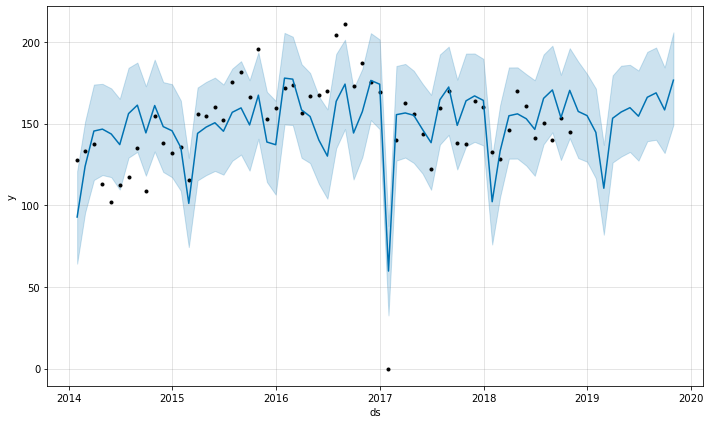

In [314]:
df_m01ab = df_monthly[['datum','m01ab']]
df_m01ab.reset_index(drop= True , inplace= True)
train_df = df_m01ab[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','m01ab':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_m01ab = m.predict(future)
m.plot(forecast_m01ab);

15:30:51 - cmdstanpy - INFO - Chain [1] start processing
15:30:52 - cmdstanpy - INFO - Chain [1] done processing


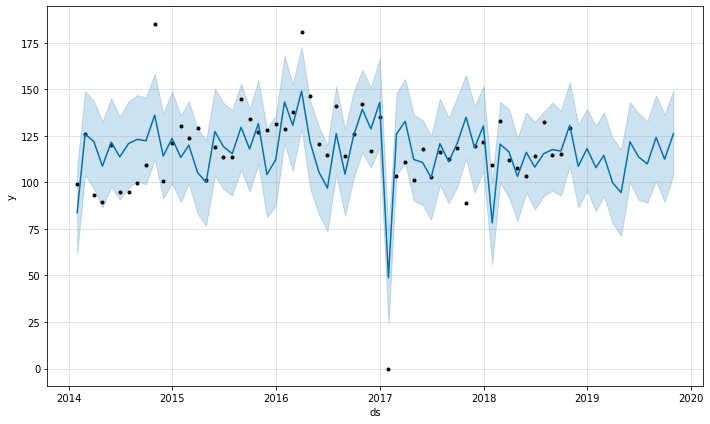

In [315]:
df_m01ae = df_monthly[['datum','m01ae']]
df_m01ae.reset_index(drop= True , inplace= True)
train_df = df_m01ae[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','m01ae':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_m01ae = m.predict(future)
m.plot(forecast_m01ae);

15:30:55 - cmdstanpy - INFO - Chain [1] start processing
15:30:55 - cmdstanpy - INFO - Chain [1] done processing


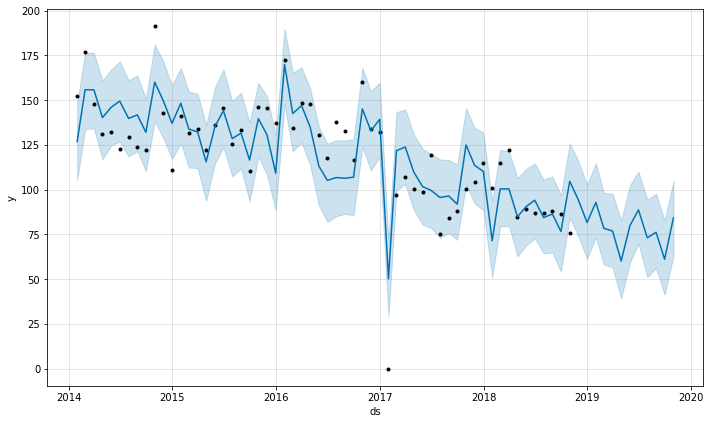

In [316]:
df_n02ba = df_monthly[['datum','n02ba']]
df_n02ba.reset_index(drop= True , inplace= True)
train_df = df_n02ba[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','n02ba':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_n02ba = m.predict(future)
m.plot(forecast_n02ba);

15:30:57 - cmdstanpy - INFO - Chain [1] start processing
15:30:57 - cmdstanpy - INFO - Chain [1] done processing


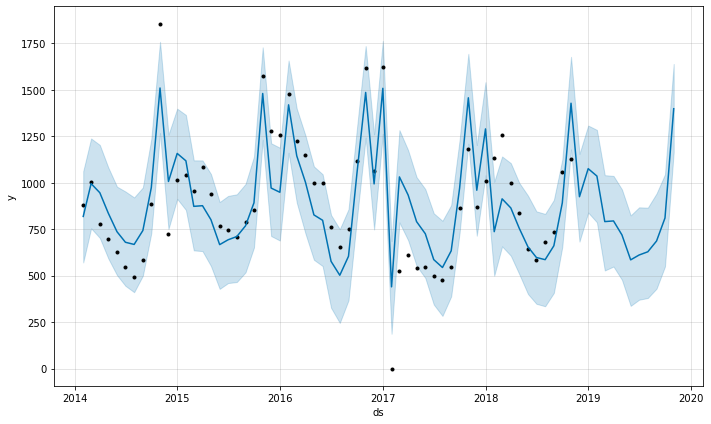

In [317]:
df_n02be = df_monthly[['datum','n02be']]
df_n02be.reset_index(drop= True , inplace= True)
train_df = df_n02be[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','n02be':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_n02be = m.predict(future)
m.plot(forecast_n02be);

15:31:01 - cmdstanpy - INFO - Chain [1] start processing
15:31:01 - cmdstanpy - INFO - Chain [1] done processing


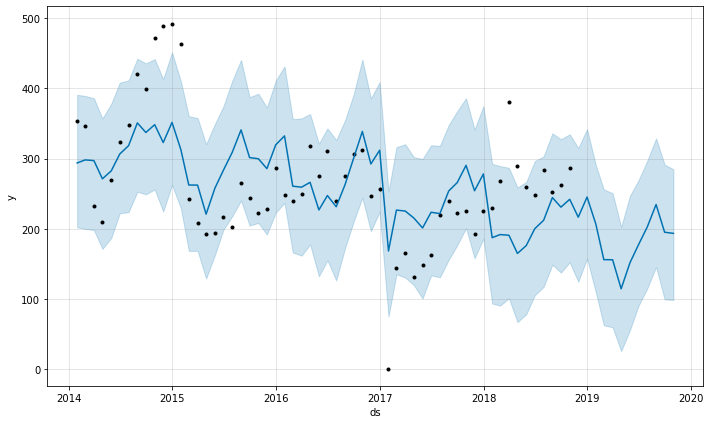

In [318]:
df_n05b = df_monthly[['datum','n05b']]
df_n05b.reset_index(drop= True , inplace= True)
train_df = df_n05b[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','n05b':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_n05b = m.predict(future)
m.plot(forecast_n05b);

15:31:03 - cmdstanpy - INFO - Chain [1] start processing
15:31:03 - cmdstanpy - INFO - Chain [1] done processing


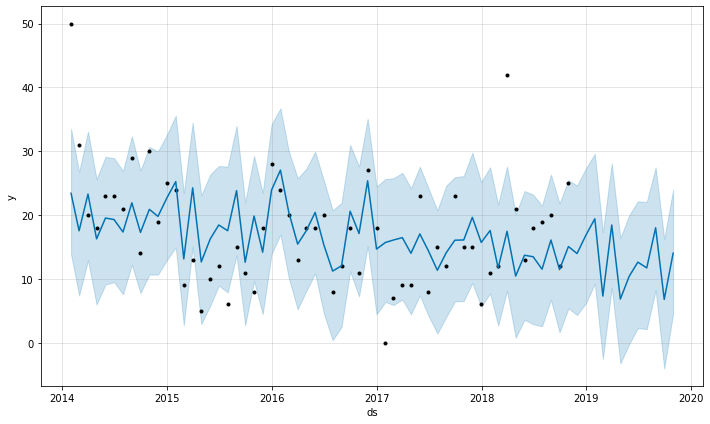

In [319]:
df_n05c = df_monthly[['datum','n05c']]
df_n05c.reset_index(drop= True , inplace= True)
train_df = df_n05c[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','n05c':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_n05c = m.predict(future)
m.plot(forecast_n05c);

15:31:04 - cmdstanpy - INFO - Chain [1] start processing
15:31:04 - cmdstanpy - INFO - Chain [1] done processing


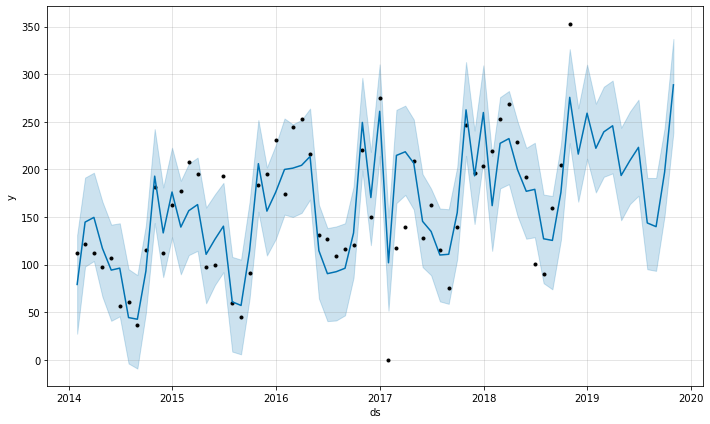

In [320]:
df_r03 = df_monthly[['datum','r03']]
df_r03.reset_index(drop= True , inplace= True)
train_df = df_r03[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','r03':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_r03 = m.predict(future)
m.plot(forecast_r03);

15:31:07 - cmdstanpy - INFO - Chain [1] start processing
15:31:07 - cmdstanpy - INFO - Chain [1] done processing


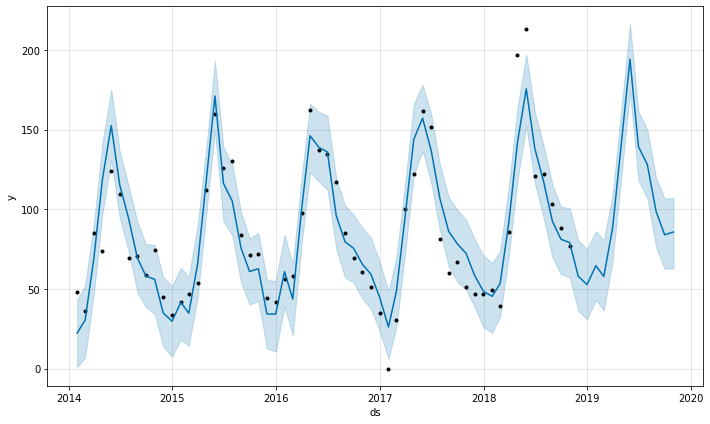

In [321]:
df_r06 = df_monthly[['datum','r06']]
df_r06.reset_index(drop= True , inplace= True)
train_df = df_r06[:-predictions]
train_df = train_df.rename(columns={'datum':'ds','r06':'y'})
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True)
m.fit(train_df)
future = m.make_future_dataframe(periods=predictions,freq='M')
forecast_r06 = m.predict(future)
m.plot(forecast_r06);

MAPE (средняя абсолютная ошибка в процентах) –  6.097838353875405
MAE (средняя абсолютная ошибка) –  21.705610510609375


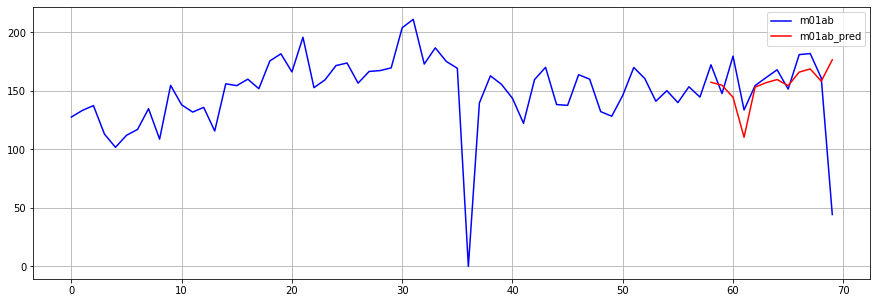

In [382]:
a = df_m01ab
a = a.rename(columns={'datum':'ds'})
b = forecast_m01ab[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'m01ab_pred'})
df_all[['m01ab','m01ab_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_m01ab.set_index('ds')[58:][['yhat']].join(df_m01ab.set_index('datum'))
cmp_df['e'] = cmp_df['m01ab'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['m01ab']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())

MAPE (средняя абсолютная ошибка в процентах) –  11.853475140662637
MAE (средняя абсолютная ошибка) –  28.16891929403126


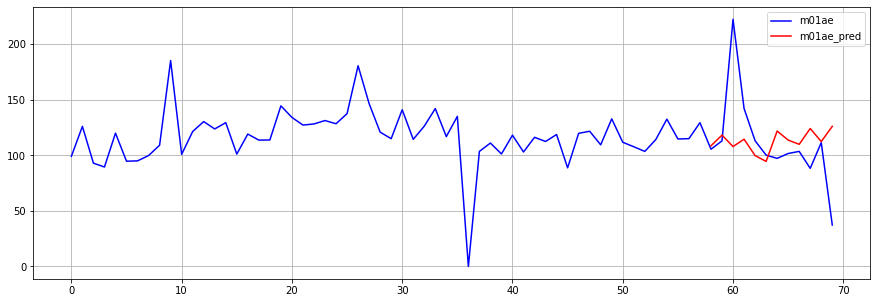

In [381]:
a = df_m01ae
a = a.rename(columns={'datum':'ds'})
b = forecast_m01ae[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'m01ae_pred'})
df_all[['m01ae','m01ae_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_m01ae.set_index('ds')[58:][['yhat']].join(df_m01ae.set_index('datum'))
cmp_df['e'] = cmp_df['m01ae'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['m01ae']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())

MAPE (средняя абсолютная ошибка в процентах) –  17.632695304591177
MAE (средняя абсолютная ошибка) –  20.516605892385595


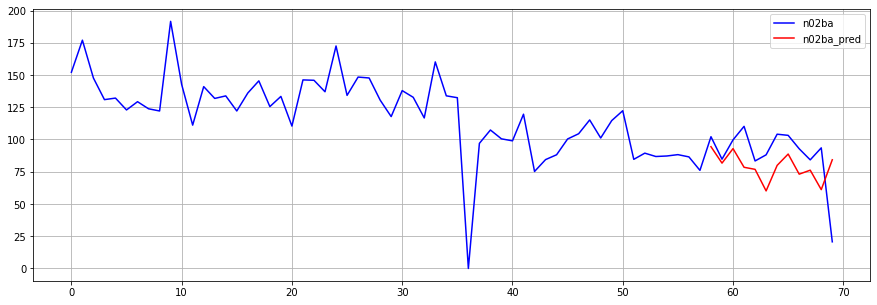

In [380]:
a = df_n02ba
a = a.rename(columns={'datum':'ds'})
b = forecast_n02ba[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'n02ba_pred'})
df_all[['n02ba','n02ba_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_n02ba.set_index('ds')[58:][['yhat']].join(df_n02ba.set_index('datum'))
cmp_df['e'] = cmp_df['n02ba'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['n02ba']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())

MAPE (средняя абсолютная ошибка в процентах) –  16.187828090969813
MAE (средняя абсолютная ошибка) –  237.2653548383793


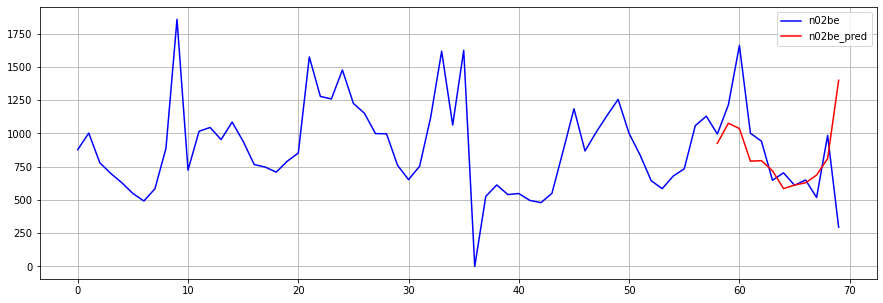

In [378]:
a = df_n02be
a = a.rename(columns={'datum':'ds'})
b = forecast_n02be[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'n02be_pred'})
df_all[['n02be','n02be_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_n02be.set_index('ds')[58:][['yhat']].join(df_n02be.set_index('datum'))
cmp_df['e'] = cmp_df['n02be'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['n02be']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())

MAPE (средняя абсолютная ошибка в процентах) –  24.583176935068828
MAE (средняя абсолютная ошибка) –  73.12806452365669


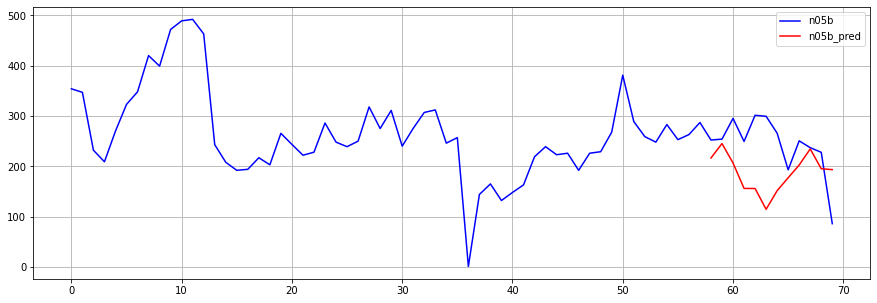

In [377]:
a = df_n05b
a = a.rename(columns={'datum':'ds'})
b = forecast_n05b[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'n05b_pred'})
df_all[['n05b','n05b_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_n05b.set_index('ds')[58:][['yhat']].join(df_n05b.set_index('datum'))
cmp_df['e'] = cmp_df['n05b'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['n05b']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())

MAPE (средняя абсолютная ошибка в процентах) –  40.180943396771454
MAE (средняя абсолютная ошибка) –  8.545564935380737


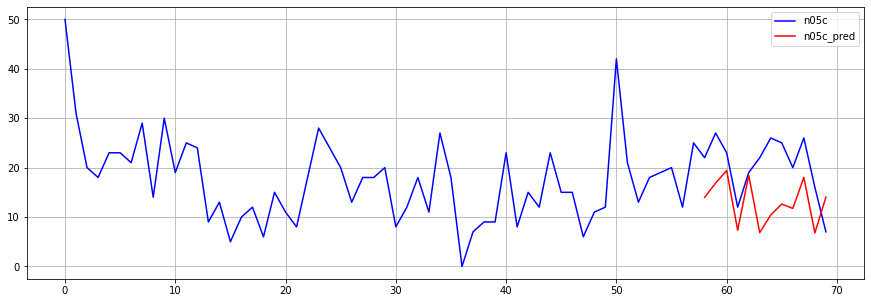

In [376]:
a = df_n05c
a = a.rename(columns={'datum':'ds'})
b = forecast_n05c[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'n05c_pred'})
df_all[['n05c','n05c_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_n05c.set_index('ds')[58:][['yhat']].join(df_n05c.set_index('datum'))
cmp_df['e'] = cmp_df['n05c'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['n05c']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())

MAPE (средняя абсолютная ошибка в процентах) –  27.9011067290914
MAE (средняя абсолютная ошибка) –  82.45171555436552


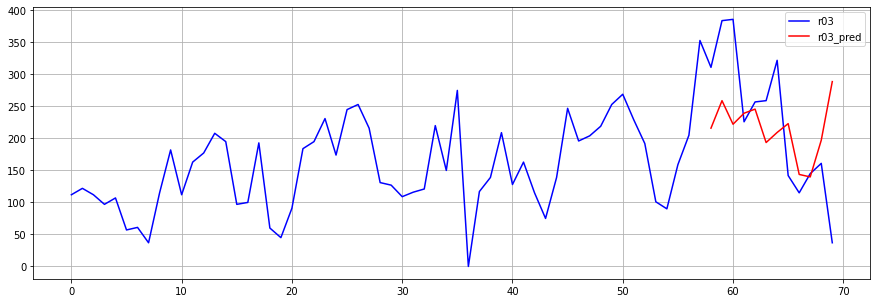

In [373]:
a = df_r03
a = a.rename(columns={'datum':'ds'})
b = forecast_r03[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'r03_pred'})
df_all[['r03','r03_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_r03.set_index('ds')[58:][['yhat']].join(df_r03.set_index('datum'))
cmp_df['e'] = cmp_df['r03'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['r03']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())

MAPE (средняя абсолютная ошибка в процентах) –  21.78950127230418
MAE (средняя абсолютная ошибка) –  30.36738459399183


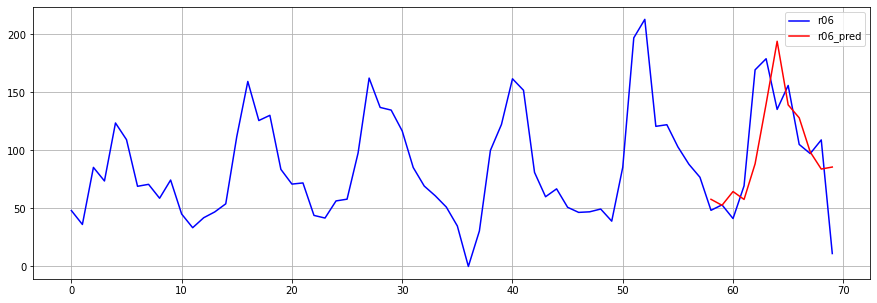

In [370]:
a = df_r06
a = a.rename(columns={'datum':'ds'})
b = forecast_r06[58:][['ds','yhat']]
df_all = pd.concat([a, b], sort=False)
df_all = df_all.rename(columns={'yhat':'r06_pred'})
df_all[['r06','r06_pred']].plot(figsize=(15, 5),grid = True,color = [(0/255,0/255,255/255),(255/255,0/255,0/255)])

cmp_df = forecast_r06.set_index('ds')[58:][['yhat']].join(df_r06.set_index('datum'))
cmp_df['e'] = cmp_df['r06'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['r06']
print('MAPE (средняя абсолютная ошибка в процентах) – ', cmp_df['p'].abs().median())
print('MAE (средняя абсолютная ошибка) – ', cmp_df['e'].abs().mean())